**NAME- SAMIA MALIK**

**DATA SCIENCE AND BUSINESS ANALYTICS INTERN AT THE SPARKS FOUNDATION** 

**TASK1:- PREDICTION USING SUPERVISED MACHINE LEARNING**

### AIM- TO PREDICT THE PERCENTAGE OF STUDENT'S BASED ON NUMBER OF STUDY HOURS


**LINK OF DATASET:http://bit.ly/w-data**



### **IMPORTING ALL THE NECESSARY LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline

### **LOADING THE DATA SET**

In [ ]:
student_data=pd.read_csv("http://bit.ly/w-data")#data set stored in variable student_data
student_data.head(30)


### **CHECKING THE CHARACTERISTICS OF STUDENT DATA**

In [6]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
student_data.shape

(25, 2)

In [11]:
student_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### **PLOTTING THE SCATTERPLOT**

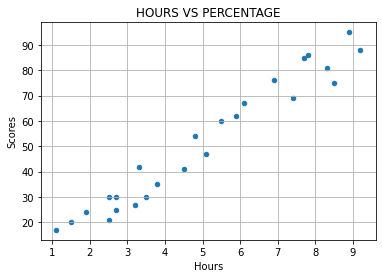

In [13]:
student_data.plot.scatter(x='Hours',y='Scores')
plt.title('HOURS VS PERCENTAGE')
plt.grid()
plt.show()

### **PLOTTING DIFFERENT GRAPHS  THE DATA USING SEABORN**
### **SCATTERPLOT**

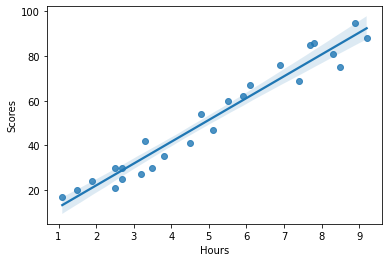

In [18]:
sbn.regplot(x=student_data['Hours'],y=student_data['Scores']);

### **BOXPLOT**

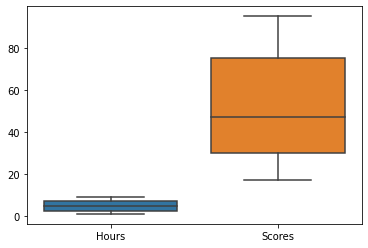

In [19]:
sbn.boxplot(data=student_data[["Hours","Scores"]]);

### **PREPARING THE student_data**

In [20]:
x=student_data.iloc[:,:-1].values
y=student_data.iloc[:,1].values

In [21]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [22]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### **SPLITTING THE STUDENT_DATA FOR TRAINING AND TEST SET**

In [24]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.25, random_state=0)

**We  have allocated 25% of student_data for testing and 75% of student_data for training purpose**

### **TRAINING THE ALGORITHM**

### **Simple Linear Regression**

### **We will predict the percentage of marks of that a student is expected to score based on number of hours he/she  has studied.**

In [25]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

print("Complete the Training.")

Complete the Trainning.


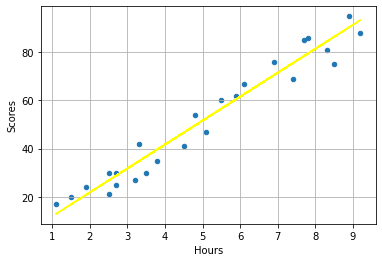

In [27]:
line = regressor.coef_*x+regressor.intercept_
student_data.plot.scatter(x="Hours", y="Scores")
plt.plot(x, line,color='yellow');
plt.grid()
plt.show()

### **After plotting the regression line, we can see there is clear indication of postive linear relation between Hours and Scores.**

In [28]:
y_pred=regressor.predict(x_test)
print(y_pred)

[16.84472176 33.74557494 75.50062397 26.7864001  60.58810646 39.71058194
 20.8213931 ]


In [30]:
df= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


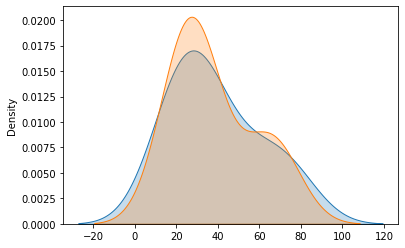

In [32]:
sbn.kdeplot(y_pred,label="Predicted",shade=True);
sbn.kdeplot(data=y_test,label="Actual",shade=True);

### **Now our aim is to predict the score's of a student who  has studied for 9.25 hrs/day.**

In [33]:
my_hours=np.array([[9.25]])
my_pred=regressor.predict(my_hours)
print("Number of Hours = {}".format(my_hours[0][0]))
print("Predicted Score = {}".format(my_pred[0]))

Number of Hours = 9.25
Predicted Score = 93.89272889341655


### **Evaluating the Model**

In [34]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.130879918502486
